# Cluster Analysis

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:
all_tweets_df = pd.read_csv("leni_tweets_oct4-9.csv")

all_tweets_df

,Unnamed: 0,Datetime,Text,Language,Username,Verified,AccountCreated,Followers,Following,MentionedUsers
0,0,2021-10-04 23:59:14+00:00,@gmanews Hindi kami boboto sa Corrupt. Sinungh...,tl,saudiboy2,False,2010-10-24 11:30:27+00:00,410,1433,"[User(username='gmanews', id=39453212, display..."
1,1,2021-10-04 23:43:52+00:00,HAPPY OCTOBER 5TH MGA KUMARE!!!! #LetLeniLead ...,tl,plinthcedd,False,2017-09-30 11:23:44+00:00,201,95,NaN
2,2,2021-10-04 23:43:38+00:00,OCTOBER 5 NA PALA\n\n#LeniforPresident2022\n#L...,tl,holyalgae,False,2019-12-08 15:09:32+00:00,181,174,NaN
3,3,2021-10-04 23:31:51+00:00,Yizzzz!\n#LetLeniLead \n#LetLeniLead2022 https...,und,speaksnow8,False,2011-05-23 09:18:57+00:00,650,648,NaN
4,4,2021-10-04 23:15:44+00:00,Magandang umaga! ✨#LetLeniLead✨,tl,anma_arte,False,2013-10-17 20:46:54+00:00,548,691,NaN
...,...,...,...,...,...,...,...,...,...,...
44316,44316,2021-10-08 00:00:25+00:00,Fly high mga Cebuano. #LetLeniLead #LabanLeni2...,tl,anjbermundo018,False,2011-05-10 06:06:25+00:00,99,250,NaN
44317,44317,2021-10-08 00:00:24+00:00,And when the broken-hearted people living in t...,en,an_bookworm,False,2021-07-12 14:35:46+00:00,16,82,NaN
44318,44318,2021-10-08 00:00:12+00:00,"Surprising, to say the least. Inspiring, at it...",en,clarrisromycin,False,2009-07-07 03:02:08+00:00,351,329,NaN
44319,44319,2021-10-08 00:00:07+00:00,So their concern now is that #pinkribbon is fo...,en,kotzallen_,False,2021-08-23 22:52:44+00:00,3,30,NaN


In [54]:
X_raw = all_tweets_df.loc[all_tweets_df["Language"] == "en", "Text"][:1000]

In [55]:
X_raw

5       Goodmorning Pilipinas🇵🇭Waiting for your Final ...
6       Today is the day!\n#LeniforPresident2022\n#Let...
11      @NaniRombi @lenirobredo Yes! We stand for this...
12      We are routing to the new Faces of Public Serv...
15      It’s time for a new brand of leadership. \n\n#...
                              ...                        
2936    I though it was today that VP Leni would make ...
2939    leaving it here... #neverforget #neveragain #L...
2942    On loop today. 😍 I wrote this song early part ...
2943    Getting ready for her announcement. The last m...
2950    Philippines politics is nothing more than a re...
Name: Text, Length: 1000, dtype: object

In [123]:
from nltk.corpus import stopwords

eng_stopwords = stopwords.words("english")

# removed # to include hashtags
special_chars = [".", ",", "!", "@", "%", "&", "*", "(", ")", "'", '""', "+", "=", "-", ";", ":", "?", "’", "'s", "...",
                 "https", "t", "co", "t co", "https t"]

all_stopwords = eng_stopwords + special_chars

all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [56]:
X_new = pd.Series([])
text = ""
i = 0

for tweet in X_raw[X_raw.str.contains("#")]:
    for w in tweet.split():
        if (w[0] == "#"):# or (w[0] == "@"):
            continue
            
        text += w + " "
            
    X_new[i] = text
    text = ""
    i += 1

<ipython-input-56-9f8917d8fe2b>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_new = pd.Series([])


In [57]:
X_new

0      Goodmorning Pilipinas🇵🇭Waiting for your Final ...
1                                     Today is the day! 
2       @NaniRombi @lenirobredo Yes! We stand for this! 
3      We are routing to the new Faces of Public Serv...
4      It’s time for a new brand of leadership. https...
                             ...                        
995    I though it was today that VP Leni would make ...
996          leaving it here... https://t.co/bzVZndnMFB 
997    On loop today. 😍 I wrote this song early part ...
998    Getting ready for her announcement. The last m...
999    Philippines politics is nothing more than a re...
Length: 1000, dtype: object

In [58]:
import nltk
from nltk.tokenize import word_tokenize

word_pos = []

try:
    for sentence in X_new:
        word = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(word)
        
        word_pos.append(tagged)
        print(tagged)
        
except Exception as e:
    print(e)


[('Goodmorning', 'VBG'), ('Pilipinas🇵🇭Waiting', 'VBG'), ('for', 'IN'), ('your', 'PRP$'), ('Final', 'NNP'), ('Decision', 'NNP'), ('Madam', 'NNP'), ('@', 'NNP'), ('lenirobredo', 'JJ'), ('Please', 'NNP'), ('hear', 'NN'), ('Us🙏🇵🇭💟', 'NNP')]
[('Today', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('day', 'NN'), ('!', '.')]
[('@', 'JJ'), ('NaniRombi', 'NNP'), ('@', 'NNP'), ('lenirobredo', 'VBZ'), ('Yes', 'UH'), ('!', '.'), ('We', 'PRP'), ('stand', 'VBP'), ('for', 'IN'), ('this', 'DT'), ('!', '.')]
[('We', 'PRP'), ('are', 'VBP'), ('routing', 'VBG'), ('to', 'TO'), ('the', 'DT'), ('new', 'JJ'), ('Faces', 'NNS'), ('of', 'IN'), ('Public', 'NNP'), ('Servant', 'NNP'), ('.', '.'), ('https', 'NN'), (':', ':'), ('//t.co/v209zhDiFP', 'NN')]
[('It', 'PRP'), ('’', 'VBZ'), ('s', 'JJ'), ('time', 'NN'), ('for', 'IN'), ('a', 'DT'), ('new', 'JJ'), ('brand', 'NN'), ('of', 'IN'), ('leadership', 'NN'), ('.', '.'), ('https', 'NN'), (':', ':'), ('//t.co/1j7736eR0E', 'NN')]
[('Innovation', 'NN'), ('distinguishes', 'NNS'), 

[('@', 'JJ'), ('NaniRombi', 'NNP'), ('@', 'NNP'), ('lenirobredo', 'VBD'), ('The', 'DT'), ('only', 'JJ'), ('logical', 'JJ'), ('choice', 'NN'), ('!', '.')]
[('Happy', 'JJ'), ('Birthday', 'NNP'), (',', ','), ('FrancisM', 'NNP'), ('❤️', 'NNP'), ('https', 'NN'), (':', ':'), ('//t.co/N8AdZ86k0F', 'NN')]
[('1', 'CD'), ('💤', 'NN'), ('to', 'TO'), ('go', 'VB'), ('!', '.')]
[('the', 'DT'), ('real', 'JJ'), ('people', 'NNS'), ('who', 'WP'), ('had', 'VBD'), ('experienced', 'VBN'), ('During', 'IN'), ('your', 'PRP$'), ('mums', 'NNS'), ('and', 'CC'), ('Binoy', 'NNP'), ("'s", 'POS'), ('administration', 'NN'), (',', ','), ('poverty', 'NN'), ('grew', 'VBD'), ('even', 'RB'), ('bigger', 'JJR'), ('and', 'CC'), ('the', 'DT'), ('rich', 'JJ'), ('got', 'VBD'), ('richer', 'JJR'), ('and', 'CC'), ('more', 'RBR'), ('corrupt', 'JJ'), ('bec', 'NN'), ('they', 'PRP'), ('always', 'RB'), ('tag', 'VBP'), ('along', 'IN'), ('with', 'IN'), ('family', 'NN'), ('..', 'NNP'), ('@', 'NNP'), ('bamaquino', 'NN'), ('wake', 'VBP'), ('

[('@', 'JJ'), ('pancitsingkit', 'NN'), ('@', 'NN'), ('ANCALERTS', 'NNP'), ('@', 'NNP'), ('lito_atienza', 'VBZ'), ('@', 'NNP'), ('MannyPacquiao', 'NNP'), ('LETS', 'NNP'), ('TWEET', 'NNP'), ('NOW', 'NNP'), ('!', '.'), ('!', '.'), ('@', 'JJ'), ('DapatSiLeni', 'NNP'), ('@', 'NNP'), ('oslecjunior', 'JJ'), ('@', 'NNP'), ('teamrobredoph', 'NN'), ('@', 'NNP'), ('aikarobredo', 'VBZ'), ('@', 'NNP'), ('jpgrobredo', 'NN'), ('@', 'NNP'), ('lenirobredo', 'NN')]
[('@', 'JJ'), ('MXM_1015', 'NNP'), ('@', 'NNP'), ('lenirobredo', 'JJ'), ('LETS', 'NNP'), ('TWEET', 'NNP'), ('NOW', 'NNP'), ('!', '.'), ('!', '.'), ('@', 'JJ'), ('DapatSiLeni', 'NNP'), ('@', 'NNP'), ('oslecjunior', 'JJ'), ('@', 'NNP'), ('teamrobredoph', 'NN'), ('@', 'NNP'), ('aikarobredo', 'VBZ'), ('@', 'NNP'), ('jpgrobredo', 'NN'), ('@', 'NNP'), ('lenirobredo', 'NN')]
[('@', 'JJ'), ('DPinoyCosmonaut', 'NNP'), ('LETS', 'NNP'), ('TWEET', 'NNP'), ('NOW', 'NNP'), ('!', '.'), ('!', '.'), ('@', 'JJ'), ('DapatSiLeni', 'NNP'), ('@', 'NNP'), ('oslecju

[('@', 'JJ'), ('unknownGalax', 'JJ'), ('@', 'NNP'), ('Justinologist', 'NNP'), ('LETS', 'NNP'), ('TWEET', 'NNP'), ('NOW', 'NNP'), ('!', '.'), ('!', '.')]
[('@', 'NN'), ('MiraLirica', 'NNP'), ('@', 'NNP'), ('Justinologist', 'NNP'), ('LETS', 'NNP'), ('TWEET', 'NNP'), ('NOW', 'NNP'), ('!', '.'), ('!', '.')]
[('@', 'JJ'), ('Alquinn56015792', 'NNP'), ('@', 'NNP'), ('Justinologist', 'NNP'), ('LETS', 'NNP'), ('TWEET', 'NNP'), ('NOW', 'NNP'), ('!', '.'), ('!', '.')]
[('@', 'JJ'), ('macpido25', 'NN'), ('@', 'NNP'), ('Justinologist', 'NNP'), ('LETS', 'NNP'), ('TWEET', 'NNP'), ('NOW', 'NNP'), ('!', '.'), ('!', '.')]
[('@', 'JJ'), ('laarnie888', 'NN'), ('@', 'NNP'), ('Justinologist', 'NNP'), ('LETS', 'NNP'), ('TWEET', 'NNP'), ('NOW', 'NNP'), ('!', '.'), ('!', '.')]
[('@', 'JJ'), ('kharen_m', 'NN'), ('@', 'NNP'), ('Justinologist', 'NNP'), ('LETS', 'NNP'), ('TWEET', 'NNP'), ('NOW', 'NNP'), ('!', '.'), ('!', '.')]
[('@', 'NN'), ('laraagain', 'NN'), ('@', 'NNP'), ('Justinologist', 'NNP'), ('LETS', 'NNP

[('@', 'RB'), ('5p6smz2tfs', 'CD'), ('@', 'JJ'), ('XOXOPIMPIMXOXO', 'NNP'), ('@', 'NNP'), ('ericaguimbal', 'JJ'), ('LETS', 'NNP'), ('TWEET', 'NNP'), ('!', '.'), ('!', '.'), ('!', '.')]
[('@', 'JJ'), ('XOXOPIMPIMXOXO', 'NNP'), ('@', 'NNP'), ('ericaguimbal', 'JJ'), ('LETS', 'NNP'), ('TWEET', 'NNP'), ('!', '.'), ('!', '.'), ('!', '.')]
[('@', 'JJ'), ('Ramser413', 'NNP'), ('@', 'NNP'), ('ericaguimbal', 'JJ'), ('LETS', 'NNP'), ('TWEET', 'NNP'), ('!', '.'), ('!', '.'), ('!', '.')]
[('LETS', 'NNP'), ('TWEET', 'NNP'), ('!', '.'), ('!', '.'), ('!', '.')]
[('If', 'IN'), ('VP', 'NNP'), ('Leni', 'NNP'), ('Robredo', 'NNP'), ('files', 'VBZ'), ('her', 'PRP$'), ('COC', 'NNP'), ('for', 'IN'), ('Presidency', 'NNP'), ('on', 'IN'), ('October', 'NNP'), ('6', 'CD'), (',', ','), ('it', 'PRP'), ('would', 'MD'), ('be', 'VB'), ('the', 'DT'), ('best', 'JJS'), ('birthday', 'NN'), ('gift', 'NN'), ('I', 'PRP'), ('could', 'MD'), ('ever', 'RB'), ('ask', 'VB'), ('for', 'IN'), ('.', '.')]
[('Statement', 'NN'), ('of', '

[('This', 'DT'), ('makes', 'VBZ'), ('me', 'PRP'), ('genuinely', 'RB'), ('happy', 'JJ'), ('.', '.'), ('@', 'JJ'), ('teamrobredoph', 'JJ'), ('https', 'NN'), (':', ':'), ('//t.co/lbioLGEn58', 'NN')]
[('@', 'JJ'), ('News5PH', 'NNP'), ('Kami', 'NNP'), ('rin', 'NN'), ('po', 'NN'), ('.', '.'), ('The', 'DT'), ('moment', 'NN'), ('you', 'PRP'), ('declare', 'VBP'), (',', ','), ('we', 'PRP'), ('will', 'MD'), ('push', 'VB'), ('it', 'PRP'), ('as', 'RB'), ('hard', 'RB'), ('as', 'IN'), ('we', 'PRP'), ('can', 'MD'), ('!', '.'), ('!', '.'), ('!', '.'), ('Tayo', 'NNP'), ('na', 'TO'), ('po', 'NN'), (',', ','), ('VP', 'NNP'), ('Leni', 'NNP'), ('!', '.'), ('!', '.'), ('!', '.'), ('👍🎗💪', 'JJ'), ('#', '#'), ('LetLeniLead', 'NNP')]
[('@', 'NN'), ('rapplerdotcom', 'NNS'), ('Need', 'VBP'), ('competent', 'JJ'), ('leaders', 'NNS'), ('of', 'IN'), ('character', 'NN'), (',', ','), ('compassion', 'NN'), (',', ','), ('conviction', 'NN'), ('to', 'TO'), ('address', 'VB'), ('root', 'NN'), ('issues', 'NNS'), (',', ','), ('

[('WHAT', 'WP'), ('A', 'DT'), ('STUPID', 'NNP'), ('AND', 'NNP'), ('SEXIST', 'NNP'), ('QUESTION', 'NNP'), (',', ','), ('HARRIETA', 'NNP'), ('!', '.'), ('?', '.'), ('!', '.'), ('MAYBE', 'NNP'), ('YOU', 'NNP'), ('NEED', 'VBP'), ('TO', 'NNP'), ('BE', 'NNP'), ('REMINDED', 'NNP'), ('THAT', 'NNP'), ('CHILDREN', 'NNP'), ('ARE', 'NNP'), ('BOTH', 'NNP'), ('PARENTS', 'NNP'), ('’', 'NNP'), ('RESPONSIBILITY', 'NNP'), ('!', '.'), ('!', '.'), ('!', '.'), ('WOMEN', 'NNP'), ('NOWADAYS', 'NNP'), ('ARE', 'NNP'), ('MORE', 'NNP'), ('THAN', 'NNP'), ('JUST', 'NNP'), ('A', 'NNP'), ('HOUSEWIFE', 'NNP'), ('.', '.'), ('OR', 'CC'), ('YOU', 'JJ'), ('’', 'JJ'), ('RE', 'NNP'), ('JUST', 'NNP'), ('THREATENED', 'NNP'), ('THAT', 'IN'), ('OUR', 'NNP'), ('NEXT', 'NNP'), ('PRESIDENT', 'NNP'), ('IS', 'VBZ'), ('A', 'NNP'), ('WOMAN', 'NNP'), ('!', '.'), ('!', '.'), ('!', '.'), ('https', 'NN'), (':', ':'), ('//t.co/ndABnAPjKj', 'NN')]
[('@', 'JJ'), ('PhilippineStar', 'NNP'), ('@', 'NNP'), ('onenewsph', 'MD'), ('very', 'RB'), (

[('FILIPINO', 'NNP'), ('ARMYS', 'NNP'), ('ARE', 'NNP'), ('FOR', 'NNP'), ('LENI', 'NNP'), ('https', 'NN'), (':', ':'), ('//t.co/jPvmQPddGJ', 'JJ'), ('https', 'NN'), (':', ':'), ('//t.co/9Nz2ttasX8', 'NN')]
[('LET', 'VB'), ('LENI', 'NNP'), ('LEAD', 'NNP'), ('.', '.'), ('That', 'DT'), ("'s", 'VBZ'), ('the', 'DT'), ('tweet', 'NN'), ('.', '.')]
[('@', 'JJ'), ('ravenjadet', 'NN'), ('Hello', 'NNP'), ('there', 'RB'), (',', ','), ('fellow', 'JJ'), ('dilawan', 'NN'), ('!', '.'), ('Thanks', 'NNS'), ('for', 'IN'), ('retweeting', 'VBG'), ('my', 'PRP$'), ('post', 'NN'), ('.', '.'), ('Have', 'VBP'), ('a', 'DT'), ('nice', 'JJ'), ('day', 'NN'), ('and', 'CC'), ('do', 'VBP'), ("n't", 'RB'), ('forget', 'VB'), ('to', 'TO'), ('vote', 'VB'), ('for', 'IN'), ('Leni', 'NNP'), ('.', '.'), ('🙂', 'NN')]
[('@', 'JJ'), ('inquirerdotnet', 'NN'), ('Boy', 'NNP'), ('Recto', 'NNP'), ('can', 'MD'), ('not', 'RB'), ('be', 'VB'), ('the', 'DT'), ('president', 'NN'), ('.', '.'), ('This', 'DT'), ('election', 'NN'), ('will', 'MD

[('Based', 'VBN'), ('on', 'IN'), ('@', 'NNP'), ('KevinKalbo', 'NNP'), ("'s", 'POS'), ('https', 'NN'), (':', ':'), ('//t.co/HWuIVatmKp', 'JJ'), ('https', 'NN'), (':', ':'), ('//t.co/87joQwLAi5', 'NN')]
[('she', 'PRP'), ('is', 'VBZ'), ('the', 'DT'), ('only', 'JJ'), ('bbm', 'NN'), ('that', 'IN'), ('i', 'JJ'), ('support', 'NN'), ('https', 'NN'), (':', ':'), ('//t.co/d5gwTfMkok', 'NN')]
[('nagawa', 'RB'), ('na', 'RB'), ('nung', 'JJ'), ('2016', 'CD'), (';', ':'), ('Ipagpatuloy', 'NNP'), ('natin', 'IN'), ('sa', 'JJ'), ('2022', 'CD'), ('.', '.'), ('We', 'PRP'), ('need', 'VBP'), ('a', 'DT'), ('competent', 'JJ'), ('leader', 'NN'), ('to', 'TO'), ('lead', 'VB'), ('us', 'PRP'), ('out', 'IN'), ('of', 'IN'), ('this', 'DT'), ('pandemic', 'NN'), (',', ','), ('not', 'RB'), ('just', 'RB'), ('politicians', 'NNS'), ('who', 'WP'), ('are', 'VBP'), ('active', 'JJ'), ('during', 'IN'), ('the', 'DT'), ('election', 'NN'), ('season', 'NN'), ('but', 'CC'), ('silent', 'JJ'), ('and', 'CC'), ('lacking', 'VBG'), ('care

[('Tapos', 'NNP'), ('si', 'NN'), ('Sara', 'NNP'), ('will', 'MD'), ('sub', 'VB'), ('Go', 'NNP'), ('for', 'IN'), ('VP', 'NNP'), ('?', '.'), ('Asus', 'NNP'), ('.', '.'), ('But', 'CC'), ('we', 'PRP'), ('all', 'DT'), ('know', 'VBP'), ('who', 'WP'), ('’', 'VBP'), ('s', 'VB'), ('the', 'DT'), ('only', 'JJ'), ('possible', 'JJ'), ('candidate', 'NN'), ('on', 'IN'), ('the', 'DT'), ('field', 'NN'), ('that', 'WDT'), ('can', 'MD'), ('beat', 'VB'), ('him', 'PRP'), (',', ','), ('right', 'RB'), ('?', '.'), ('In', 'IN'), ('fact', 'NN'), (',', ','), ('she', 'PRP'), ('did', 'VBD'), ('—', 'VB'), ('three', 'CD'), ('times', 'NNS'), ('over', 'IN'), ('in', 'IN'), ('the', 'DT'), ('last', 'JJ'), ('six', 'CD'), ('years', 'NNS'), ('.', '.'), ('Kaya', 'NNP'), ('https', 'NN'), (':', ':'), ('//t.co/Dmf62blErZ', 'NN')]
[('PLEASE', 'NNP'), ('.', '.'), ('🙌🏽', 'CC'), ('https', 'NN'), (':', ':'), ('//t.co/ShlzN6mLo1', 'NN')]
[('@', 'JJ'), ('barrygutierrez3', 'NN'), ('Hoping', 'NNP'), ('and', 'CC'), ('praying', 'VBG'), ('th

[('ctto', 'NN'), ('-LEGIT', 'NN'), ('!', '.'), ('https', 'NN'), (':', ':'), ('//t.co/7rKEkq8GVT', 'NN')]
[('Yes', 'UH'), ('!', '.'), ('!', '.'), ('Go', 'NNP'), (',', ','), ('VP', 'NNP'), ('Leni', 'NNP'), ('!', '.'), ('!', '.'), ('!', '.'), ('We', 'PRP'), ('are', 'VBP'), ('behind', 'IN'), ('you', 'PRP'), ('🤗🙌🙏🙏', 'VBP'), ('https', 'NNS'), (':', ':'), ('//t.co/1nJhS4uCKf', 'NN')]
[('THIS', 'NN'), ('IS', 'VBZ'), ('IT', 'NNP'), ('🥺🙏', 'NNP'), ('https', 'NN'), (':', ':'), ('//t.co/EhjnZtY0Ts', 'NN')]
[('HERE', 'NNP'), ('IT', 'NNP'), ('IS', 'VBZ'), ('!', '.'), ('!', '.'), ('!', '.'), ('!', '.'), ('!', '.'), ('https', 'NN'), (':', ':'), ('//t.co/aCuv5Jg5pK', 'NN')]
[('LETS', 'NNP'), ('GO', 'NNP'), ('MISS', 'NNP'), ('MAAAAAAM', 'NNP'), ('https', 'NN'), (':', ':'), ('//t.co/mRt3qqKRT8', 'NN')]
[('@', 'JJ'), ('barrygutierrez3', 'NN'), ('Let', 'NNP'), ("'s", 'POS'), ('go', 'VB'), ('!', '.'), ('!', '.'), ('!', '.')]
[('LENI', 'NNP'), ('IS', 'NNP'), ('MY', 'NNP'), ('PRESIDENT', 'NNP'), ('https', 'N

[('Lets', 'NNS'), ('go', 'VBP'), ('Bobong', 'NNP'), ('Marco/s', 'NNP'), ('!', '.'), ('https', 'NN'), (':', ':'), ('//t.co/JSIe1ef7Ui', 'NN')]
[('More', 'RBR'), ('reason', 'NN'), ('for', 'IN'), ('@', 'NN'), ('lenirobredo', 'NN'), ('to', 'TO'), ('run', 'VB'), ('.', '.'), ('https', 'NN'), (':', ':'), ('//t.co/3wwIwaifGH', 'NN')]
[('Let', 'VB'), ('LENI', 'NNP'), ('lead', 'VB'), ('!', '.'), ('!', '.'), ('!', '.'), ('We', 'PRP'), ('need', 'VBP'), ('you', 'PRP'), ('Madam', 'NNP'), ('Leni', 'NNP'), ('more', 'RBR'), ('than', 'IN'), ('ever', 'RB'), ('.', '.'), ('https', 'NN'), (':', ':'), ('//t.co/n9mTMuTmAo', 'NN')]
[('Halu', 'NNP'), (',', ','), ('Sam', 'NNP'), ('already', 'RB'), ('apologized', 'VBD'), ('.', '.'), ('Pero', 'NNP'), ('never', 'RB'), ('magiging', 'VBG'), ('acceptable', 'JJ'), ('ang', 'NN'), ('pagpanig', 'NN'), ('sa', 'NN'), ('mga', 'NN'), ('mamamatay', 'NN'), ('tao', 'NN'), ('at', 'IN'), ('paninisi', 'NN'), ('sa', 'NN'), ('taumbayan', 'NN'), ('.', '.'), ('Let', 'VB'), ("'s", 'POS'

[('WAITING', 'NN'), ('FOR', 'NNP'), ('LENI', 'NNP'), ('!', '.'), ('!', '.'), ('!', '.')]
[('I', 'PRP'), ('just', 'RB'), ('want', 'VBP'), ('a', 'DT'), ('president', 'NN'), ('who', 'WP'), ('can', 'MD'), ('do', 'VB'), ('good', 'JJ'), ('work', 'NN'), ('.', '.'), ('https', 'NN'), (':', ':'), ('//t.co/sv0dOjUG1I', 'NN')]
[('Waiting', 'VBG'), ('for', 'IN'), ('VP', 'NNP'), ('Leni', 'NNP'), ("'s", 'POS'), ('announcement', 'NN'), ('because', 'IN'), ('THAT', 'DT'), ('right', 'NN'), ('there', 'RB'), ('fulfills', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('her', 'PRP$'), ('conditions', 'NNS'), ('.', '.')]
[('please', 'NN'), ('🙏🙏🙏', 'VB')]
[('Waiting', 'VBG'), ('for', 'IN'), ('the', 'DT'), ('good', 'JJ'), ('news', 'NN'), ('💜💗💜💗', 'NN')]
[('LOOK', 'NN'), (':', ':'), ('Billboards', 'NNS'), ('that', 'IN'), ('display', 'NN'), ('“', 'NNP'), ('Let', 'NNP'), ('Leni', 'NNP'), ('Lead', 'NNP'), ('”', 'NN'), ('are', 'VBP'), ('seen', 'VBN'), ('along', 'IN'), ('C5', 'NNP'), ('on', 'IN'), ('Monday', 'NNP'), (',', ',')

[('Aside', 'RB'), ('that', 'DT'), ('today', 'NN'), ('is', 'VBZ'), ('World', 'NNP'), ("'s", 'POS'), ('teachers', 'NNS'), ('day', 'NN'), ('!', '.'), ('!', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('also', 'RB'), ('the', 'DT'), ('day', 'NN'), ('that', 'IN'), ('VP', 'NNP'), ('Leni', 'NNP'), ('will', 'MD'), ('decide', 'VB'), ('!', '.'), ('!', '.'), ('!', '.')]
[('This', 'DT'), ('is', 'VBZ'), ('it', 'PRP'), (',', ','), ('pansit', 'NN'), ('!', '.'), ('https', 'NN'), (':', ':'), ('//t.co/i4jRk58MVN', 'NN')]
[('Carpe', 'NNP'), ('diem', 'NN'), ('https', 'NN'), (':', ':'), ('//t.co/vBabXvMMsc', 'NN')]
[('Galing', 'VBG'), ('ako', 'NN'), ('ng', 'JJ'), ('night', 'NN'), ('shift', 'NN'), ('&', 'CC'), ('amp', 'NN'), (';', ':'), ('I', 'PRP'), ('’', 'VBP'), ('m', 'RB'), ('a', 'DT'), ('bit', 'NN'), ('sleepy', 'JJ'), ('.', '.'), ('But', 'CC'), ('I', 'PRP'), ('don', 'VBP'), ('’', 'JJ'), ('t', 'NN'), ('wan', 'NN'), ('na', 'RB'), ('be', 'VB'), ('late', 'RB'), ('to', 'TO'), ('the', 'DT'), ('party', 'NN'), ('.', '.'

[('On', 'IN'), ('Thursday', 'NNP'), ('we', 'PRP'), ('wear', 'VBP'), ('pink', 'JJ'), ('.', '.'), ('https', 'NN'), (':', ':'), ('//t.co/zKasaFJD5j', 'NN')]
[('It', 'PRP'), ('’', 'VBZ'), ('s', 'JJ'), ('pink', 'NNS'), ('Thursday', 'NNP'), ('!', '.'), ('🌸', 'NN'), ('https', 'NN'), (':', ':'), ('//t.co/YUoYsYNERc', 'NN')]
[('The', 'DT'), ('Power', 'NNP'), ('in', 'IN'), ('PINK', 'NNP'), ('.', '.'), ('💗🇵🇭', 'CC'), ('https', 'NN'), (':', ':'), ('//t.co/QeCPk2nwys', 'NN')]
[('@', 'JJ'), ('F1rstkosiLeni', 'NNP'), ('@', 'NNP'), ('LGBTQIAforLeni', 'NNP'), ('@', 'NNP'), ('millennials4PH', 'NN'), ('@', 'NNP'), ('teamrobredoph', 'NN'), ('@', 'NNP'), ('SHSforLENI', 'NNP'), ('@', 'NNP'), ('lenirobredo', 'VBZ'), ('Our', 'PRP$'), ('best', 'JJS'), ('choice', 'NN'), ('!', '.')]
[('On', 'IN'), ('thursday', 'NN'), (',', ','), ('we', 'PRP'), ('wear', 'VBP'), ('PINK', 'NNP'), ('.', '.'), ('💗', 'NN')]
[('I', 'PRP'), ("'m", 'VBP'), ('waiting', 'VBG'), ('for', 'IN'), ('the', 'DT'), ('good', 'JJ'), ('news🙏', 'NN')]

[('This', 'DT'), ('movie', 'NN'), ('was', 'VBD'), ('released', 'VBN'), ('a', 'DT'), ('month', 'NN'), ('before', 'IN'), ('February', 'NNP'), ('1986', 'CD'), ('.', '.'), ('Wala', 'NNP'), ('lang', 'NN'), (',', ','), ('hehe', 'NN'), ('!', '.'), ('https', 'NN'), (':', ':'), ('//t.co/9rTD1Sl6jo', 'NN')]
[('Today', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('day', 'NN'), ('.', '.'), ('Whatever', 'WDT'), ('your', 'PRP$'), ('decision', 'NN'), ('Miss', 'NNP'), ('Madam', 'NNP'), ('is', 'VBZ'), (',', ','), ('I', 'PRP'), ('will', 'MD'), ('support', 'VB'), ('you', 'PRP'), ('.', '.'), ('@', 'VB'), ('lenirobredo', 'NN')]
[('Orange', 'NN'), ('is', 'VBZ'), ('my', 'PRP$'), ('favorite', 'JJ'), ('color', 'NN'), ('but', 'CC'), ('today', 'NN'), ('I', 'PRP'), ('will', 'MD'), ('wear', 'VB'), ('pink', 'JJ'), ('💗💗💗', 'NNP'), ('https', 'NN'), (':', ':'), ('//t.co/mySTyJkXBR', 'NN')]
[('waiting', 'VBG'), ('for', 'IN'), ('the', 'DT'), ('announcement', 'NN')]
[('I', 'PRP'), ('am', 'VBP'), ('a', 'DT'), ('MAINER', 'NNP'), 

[('@', 'JJ'), ('sharkbaitshark', 'NN'), ('@', 'NNP'), ('iamtix95', 'NN'), ('I', 'PRP'), ('’', 'VBP'), ('m', 'RB'), ('from', 'IN'), ('Ilocos', 'NNP'), ('Sur', 'NNP'), ('too', 'RB'), ('.', '.'), ('My', 'PRP$'), ('father', 'NN'), ('and', 'CC'), ('several', 'JJ'), ('of', 'IN'), ('my', 'PRP$'), ('relatives', 'NNS'), ('led', 'VBN'), ('by', 'IN'), ('my', 'PRP$'), ('grandaunt', 'NN'), ('who', 'WP'), ('was', 'VBD'), ('a', 'DT'), ('former', 'JJ'), ('Provincial', 'NNP'), ('Board', 'NNP'), ('member', 'NN'), (',', ','), ('were', 'VBD'), ('staunch', 'JJ'), ('anti', 'JJ'), ('Marcos', 'NNP'), ('activists', 'NNS'), ('during', 'IN'), ('the', 'DT'), ('Martial', 'NNP'), ('Law', 'NNP'), ('years', 'NNS'), ('.', '.'), ('They', 'PRP'), ('almost', 'RB'), ('got', 'VBD'), ('killed', 'VBN'), ('because', 'IN'), ('of', 'IN'), ('it', 'PRP'), ('.', '.')]
[('11AM', 'CD'), ('later', 'RB'), ('everyone', 'NN'), ('!', '.'), ('!', '.'), ('!', '.'), ('https', 'NN'), (':', ':'), ('//t.co/8Mc8DD4Jim', 'NN')]
[('Leni', 'NNP'),

[('Tomorrow', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('day', 'NN'), ('we', 'PRP'), ('all', 'DT'), ('start', 'VBP'), ('hoping', 'VBG'), ('again', 'RB'), ('for', 'IN'), ('a', 'DT'), ('better', 'JJR'), ('nation', 'NN'), ('.', '.')]
[('Ready', 'JJ'), ('na', 'TO'), ('pink', 'VB'), ('shirt', 'NN'), ('ko', 'NN'), ('for', 'IN'), ('tom', 'NN'), ('🌸', 'NNP'), ('@', 'NNP'), ('lenirobredo', 'NN'), ('for', 'IN'), ('president', 'NN'), ('!', '.'), ('👚💁🏻\u200d♀️', 'NN')]
[('Changing', 'VBG'), ('my', 'PRP$'), ('un', 'JJ'), ('pic', 'NN'), ('temporarily', 'RB'), ('for', 'IN'), ('the', 'DT'), ('announcement', 'NN'), ('of', 'IN'), ('VP', 'NNP'), ('Leni', 'NNP'), ('.', '.'), ('Hoping', 'VBG'), ('for', 'IN'), ('a', 'DT'), ('great', 'JJ'), ('news', 'NN'), ('!', '.'), ('!', '.')]
[('Restaurants', 'NNS'), ('in', 'IN'), ('Naga', 'NNP'), ('are', 'VBP'), ('giving', 'VBG'), ('discounts', 'NNS'), ('or', 'CC'), ('freebies', 'NNS'), ('to', 'TO'), ('everyone', 'NN'), ('wearing', 'VBG'), ('pink', 'NN'), ('tomorrow', 'NN')

[('Ang', 'NNP'), ('IT-BPO', 'NNP'), ('for', 'IN'), ('Leni', 'NNP'), ('ay', 'NN'), ('handang', 'NN'), ('handa', 'NN'), ('na', 'NN'), ('!', '.'), ('VP', 'NNP'), ('Leni', 'NNP'), ("'s", 'POS'), ('announcement', 'NN'), ('will', 'MD'), ('be', 'VB'), ('livestreamed', 'VBN'), ('at', 'IN'), ('https', 'NN'), (':', ':'), ('//t.co/H1ph5TmaGO', 'NN'), (',', ','), ('11AM', 'CD'), ('.', '.'), ('Kitakits', 'NNS'), ('!', '.'), ('https', 'NN'), (':', ':'), ('//t.co/52QXQcv0Z4', 'NN')]
[('Leni', 'NNP'), ('stans', 'NNS'), ('have', 'VBP'), ('you', 'PRP'), ('received', 'VBN'), ('the', 'DT'), ('dm', 'NN'), ('?', '.'), ('YES', 'UH'), ('LENI', 'NNP'), ('ROBREDO', 'NNP'), ('PO', 'NNP')]
[('Leni', 'NNP'), ('Robredo', 'NNP'), ('is', 'VBZ'), ('my', 'PRP$'), ('president', 'NN'), ('.', '.'), ('On', 'IN'), ('Thursday', 'NNP'), (',', ','), ('Oct.', 'NNP'), ('7', 'CD'), (',', ','), ('2021', 'CD'), (',', ','), ('we', 'PRP'), ('wear', 'VBP'), ('pink', 'JJ'), ('.', '.'), ('https', 'NN'), (':', ':'), ('//t.co/6CC9OeIak8',

[('@', 'JJ'), ('xtian_mano', 'NNP'), ('@', 'NNP'), ('dzrhnews', 'VBZ'), ('To', 'TO'), ('me', 'PRP'), ('this', 'DT'), ('is', 'VBZ'), ('just', 'RB'), ('a', 'DT'), ('distraction', 'NN'), ('.', '.'), ('We', 'PRP'), ('dont', 'VBP'), ('know', 'VB'), ('also', 'RB'), ('if', 'IN'), ('BBM', 'NNP'), ('group', 'NN'), ('planted', 'VBD'), ('this', 'DT'), ('or', 'CC'), ('not', 'RB'), ('.', '.'), ('Regardless', 'RB'), (',', ','), ('this', 'DT'), ('has', 'VBZ'), ('been', 'VBN'), ('called', 'VBN'), ('out', 'RP'), ('and', 'CC'), ('let', 'VB'), ('authorities', 'NNS'), ('investigate', 'VB'), ('.', '.'), ('Eyes', 'NNS'), ('on', 'IN'), ('the', 'DT'), ('Prize', 'NNP'), ('.', '.')]
[('Let', 'VB'), ('’', 'NNP'), ('s', 'VB'), ('Go', 'NNP'), ('!', '.'), ('https', 'NN'), (':', ':'), ('//t.co/uQ0ajePek7', 'NN')]
[('@', 'JJ'), ('agot_isidro', 'NN'), ('@', 'NNP'), ('DapatSiLeni', 'NNP'), ('Pink', 'NNP'), ('it', 'PRP'), ('is', 'VBZ'), ('!', '.')]
[('Best', 'NNP'), ('President', 'NNP'), ('Philippines', 'NNP'), ('Ever',

[('the', 'DT'), ('prayer', 'NN'), ('....', 'NNP'), ('😅', 'NNP'), ('ok', 'JJ'), ('class', 'NN'), (',', ','), ('dismissed', 'VBD'), ('!', '.'), ('https', 'NN'), (':', ':'), ('//t.co/3YddDBuwJC', 'NN')]
[('@', 'JJ'), ('barrygutierrez3', 'NN'), ('Great', 'NNP'), ('!', '.'), ('That', 'DT'), ("'", "''"), ('s', 'VBZ'), ('a', 'DT'), ('good', 'JJ'), (',', ','), ('good', 'JJ'), ('sign', 'NN'), ('!', '.'), ('I', 'PRP'), ('am', 'VBP'), ('getting', 'VBG'), ('goosebumps', 'NNS'), ('!', '.'), ('Loving', 'VBG'), ('this', 'DT'), ('collab', 'NN'), ('!', '.'), ('Leni', 'NNP'), ('for', 'IN'), ('President', 'NNP'), ('plus', 'CC'), ('Eraserheads', 'NNP'), ('reunion', 'NN'), ('concert', 'NN'), ('!', '.'), ('Parang', 'NNP'), ('You', 'PRP'), ('are', 'VBP'), ('our', 'PRP$'), ('Universe', 'JJ'), ('VP', 'NNP'), ('Leni', 'NNP'), ('!', '.'), ('@', 'NN'), ('lenirobredo', 'JJ'), ('ctto', 'NN'), (':', ':'), ('https', 'NN'), (':', ':'), ('//t.co/RyvqU9cAxo', 'NN')]
[('It', 'PRP'), ('takes', 'VBZ'), ('courage', 'NN'), (

In [60]:
word_pos[0]

[('Goodmorning', 'VBG'),
 ('Pilipinas🇵🇭Waiting', 'VBG'),
 ('for', 'IN'),
 ('your', 'PRP$'),
 ('Final', 'NNP'),
 ('Decision', 'NNP'),
 ('Madam', 'NNP'),
 ('@', 'NNP'),
 ('lenirobredo', 'JJ'),
 ('Please', 'NNP'),
 ('hear', 'NN'),
 ('Us🙏🇵🇭💟', 'NNP')]

In [69]:
words = []

for tweet in word_pos:
    for word, pos in tweet:
        if word.startswith("/") or (word in special_chars):
            continue
        if pos.startswith("N"):
            words.append(word)

In [70]:
words

['Final',
 'Decision',
 'Madam',
 'Please',
 'hear',
 'Us🙏🇵🇭💟',
 'Today',
 'day',
 'NaniRombi',
 'Faces',
 'Public',
 'Servant',
 'time',
 'brand',
 'leadership',
 'Innovation',
 'distinguishes',
 'leader',
 'follower',
 'VIP',
 'treatment',
 'Naman',
 'Facebook',
 'day',
 'Today',
 'day',
 'Leni',
 'ng',
 'candidacy',
 'hope',
 'Philippines',
 'fight',
 'causes',
 'THIS',
 'MEAN',
 'DDShts',
 'GONE',
 'NOW',
 'TOO',
 'Heaven',
 'place',
 'Earth',
 'wrist',
 'supporters',
 'quality',
 'baller',
 'till',
 '😄😍🥰',
 'Facebook',
 'Instagram',
 'WhatsApp',
 'Messenger',
 'Duterte',
 'admin',
 'Hi',
 'campaign',
 'error',
 'message',
 'day',
 'Hey',
 'Mark',
 'Zuckerberg',
 'Facebook',
 'apps',
 'someone',
 'worthy',
 'HER',
 'COC',
 'presidency',
 'Imagine',
 'budget',
 'resources',
 'goddamn',
 'mark',
 'TO',
 'IT',
 'Oct',
 'day',
 'FB',
 'FB',
 'platforms',
 'plot',
 '..',
 'odds',
 'favor',
 '..',
 '🇵🇭🇵🇭🇵🇭',
 'man',
 'standing',
 'woman',
 'TheManilaTimes',
 'Mayor',
 'Albay',
 'Wow',
 '

In [71]:
vectorizer = TfidfVectorizer(stop_words=all_stopwords)
X = vectorizer.fit_transform(words)

X

<5231x1686 sparse matrix of type '<class 'numpy.float64'>'
	with 4703 stored elements in Compressed Sparse Row format>

In [72]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [119]:
model = KMeans(n_clusters=2, init="k-means++", max_iter=100, n_init=1)
model.fit(X)

centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [124]:
len(vectorizer.get_feature_names())

1686

In [120]:
def print_cluster(i):
    print("Cluster", i, ":")
    for ind in centroids[i, :10]:  # gets top 10 of each cluster (centroid)
        print("- ", terms[ind])
    
    
for i in range(2):
    print_cluster(i)

Cluster 0 :
-  leni
-  tweet
-  lets
-  president
-  lenirobredo
-  vp
-  dapatsileni
-  pink
-  teamrobredoph
-  jpgrobredo
Cluster 1 :
-  tomorrow
-  zuckerberg
-  gone
-  giveaways
-  glimmer
-  go
-  goal
-  gobyerno
-  god
-  goddamn


In [125]:
pd.DataFrame(model.labels_).value_counts()

0    5184
1      47
dtype: int64

In [88]:
davies_bouldin_score(X.toarray(), model.predict(X))

0.8900785333992548

In [106]:
scores = []

for i in range(2, 11):
    model = KMeans(n_clusters=i, init="k-means++", max_iter=100, n_init=1)
    model.fit(X)
    
    score = davies_bouldin_score(X.toarray(), model.predict(X))
    
    scores.append((i, score))

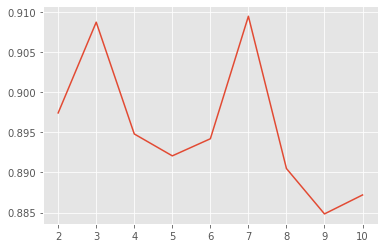

In [107]:
plt.plot(np.array(scores)[:, 0], np.array(scores)[:, 1])